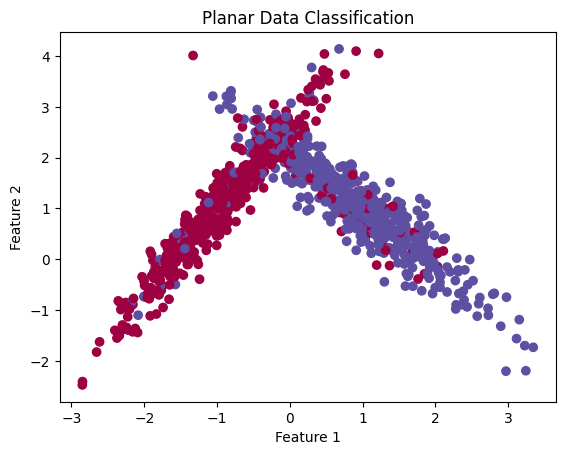

/Users/rohansridhar/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.86


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Function to load a planar dataset
def load_planar_dataset(samples=1000, noise=0.2, random_state=42):
    X, y = make_classification(n_samples=samples, n_features=2, n_redundant=0, n_informative=2,
                               n_clusters_per_class=1, flip_y=noise, random_state=random_state)
    return X.T, y.reshape(1, -1)

# Load planar dataset using the custom function
X, Y = load_planar_dataset()

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, cmap=plt.cm.Spectral)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Planar Data Classification')
plt.show()

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X.T, Y.T, test_size=0.2, random_state=42)

# Define and train a neural network classifier
classifier = MLPClassifier(hidden_layer_sizes=(4,), activation='relu', solver='adam', max_iter=1000, random_state=42)
classifier.fit(X_train, Y_train)

# Predict labels for test data
Y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)



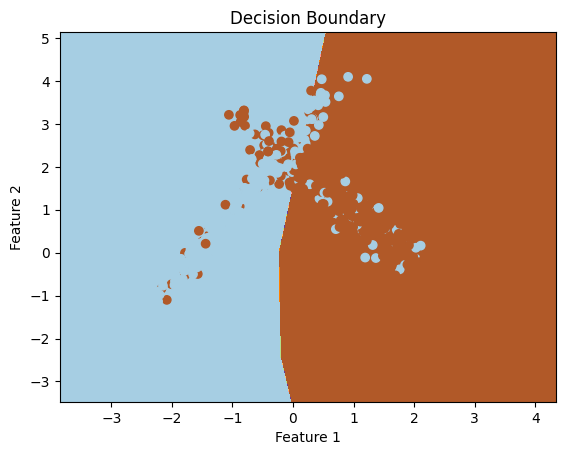

In [21]:
# Visualization after classification
def plot_decision_boundary(X, y, classifier):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

# Plot decision boundary
plot_decision_boundary(X.T, Y[0], classifier)
